<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
df= pd.read_csv('StudentsPerformance.csv')
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

# Step 4: Display PairPlot

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


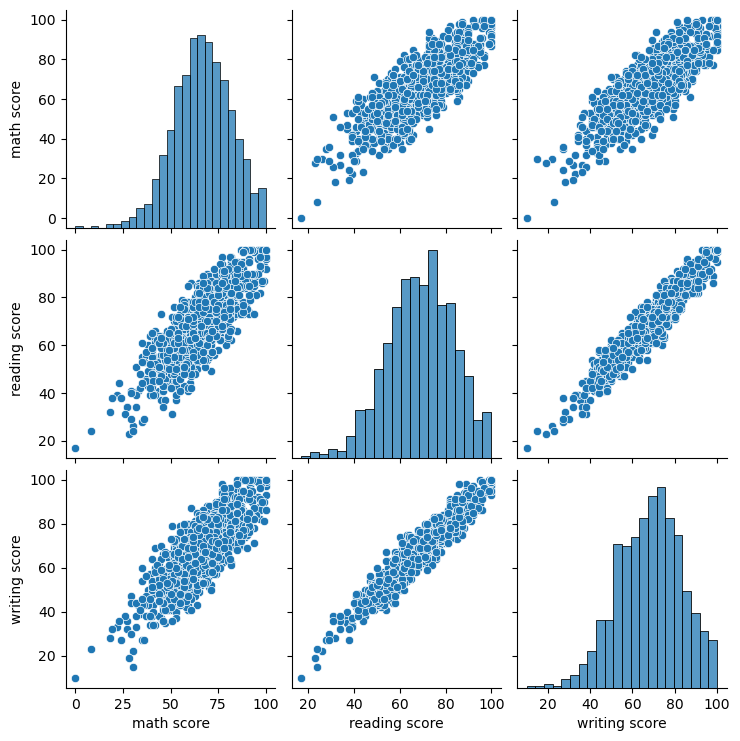

In [4]:
sns.pairplot(df)

# Step 5: Correlation heatmap

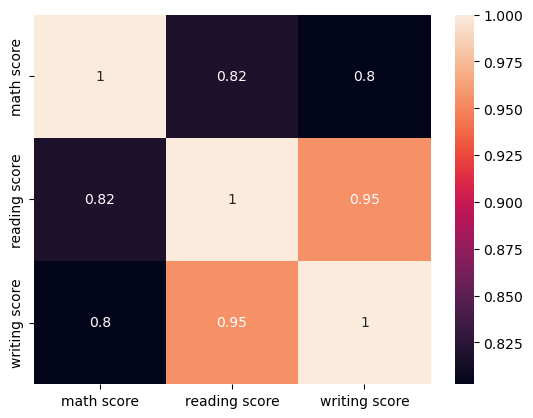

In [5]:
pp  = sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True)

# Step 6: Distribution of numerical features

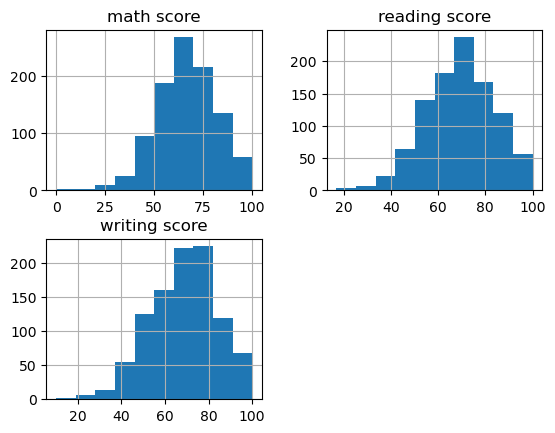

In [6]:
df.hist()
plt.show()

# Step 7: Apply StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [9]:
x = df[['math score','reading score','writing score']]

In [10]:
x_transform = ss.fit_transform(x)

In [11]:
x_transform

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

# Step 8: Elbow method to find optimal k

In [12]:
d = []

for k in range(1,51):
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(x_transform)
    d.append(model.inertia_)

NameError: name 'KMeans' is not defined

In [13]:
d

[]

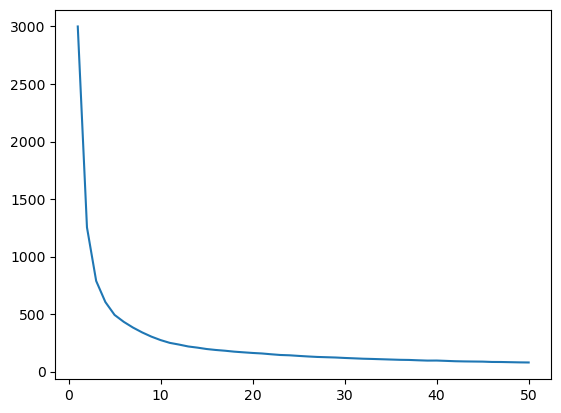

In [28]:
plt.plot(range(1,51), d)
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3, random_state= 42)

In [16]:
model.fit(x_transform)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [17]:
model.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

In [18]:
df['kmeans'] = model.labels_

In [19]:
df['kmeans'].value_counts()

kmeans
0    443
2    308
1    249
Name: count, dtype: int64

# Step 11: Plot Cluster

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14088\4103162090.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_transform[:,0], x_transform[:,1], s=df['kmeans'], cmap='viridis')


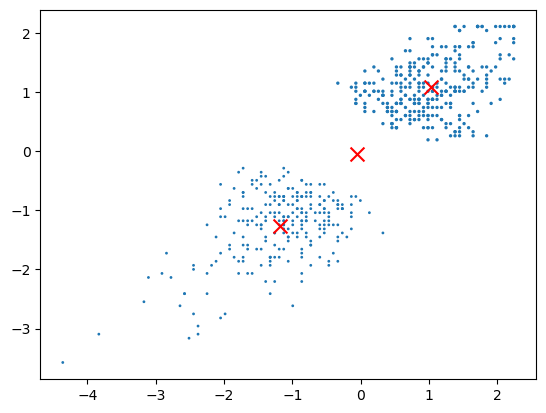

In [20]:
plt.scatter(x_transform[:,0], x_transform[:,1], s=df['kmeans'], cmap='viridis')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red', marker='x', s=100)

plt.show()

TypeError: Axes3D.scatter() missing 2 required positional arguments: 'xs' and 'ys'

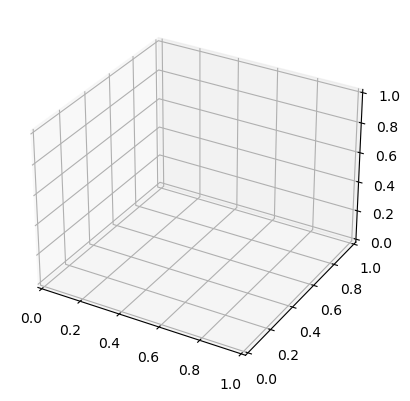

In [22]:
ax = plt.axes(projection = '3d')

sns.scatterplot(df,x='reading score',y='writing score', hue='kmeans')
plt.show()

plt.

# Step 12:Analyze clusters 

In [23]:
df['total'] = df['reading score'] + df['writing score'] + df['math score']

In [24]:
gd = df.groupby("kmeans")

In [25]:
for k, cluster_data in gd:
    print(k,cluster_data['total'].min(), cluster_data['total'].max())
    print('--'*5)

0 175 226
----------
1 27 175
----------
2 226 300
----------


# Step 13: Perform K-Medoids

In [26]:
pip install scikit-learn-extra

  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   --- ------------------------------------ 30.7/340.5 kB ? eta -:--:--
   ------------- -------------------------- 112.6/340.5 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  337.9/340.5 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn_extra.cluster import KMedoids

In [ ]:
model2 = KMedoids(n_clusters=3, random_state=4)

# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]